# Diplodatos 2025
## M18: Lectura Distante de Canciones Argentinas
### El proyecto

Este proyecto busca ofrecer un primer acercamiento al procesamiento del lenguaje natural (NLP), el área del machine learning que se encarga del lenguaje. Para eso, vamos a usar como "excusa" un dataset con alrededor de 30.000 letras de canciones argentinas. También se puede pensar al revés: el objetivo principal es hacer un análisis cultural con datos y la herramienta indicada para eso es el NLP.

En la práctica, el énfasis depende de ustedes: pueden tratar de entrenar un modelo muy efectivo, usando las técnicas más sofisticadas que veamos; o pueden entrenar modelos sencillos pero más interpretables, que permitan "generar conocimiento".

### "Lectura distante"
Este es un término acuñado por Franco Moretti en un ensayo del 2000, titulado ["Conjectures on World Literature"](https://warwick.ac.uk/fac/arts/english/currentstudents/undergraduates/modules/fulllist/special/globalnovel/moretti-conjectures-nlr_1.pdf). Moretti es un especialista en literaturas comparadas y pionero de las "digital humanities" que a la vuelta del siglo pasado entendió que para estudiar realmente el sistema literario mundial sin restringirse a un puñado de "clásicos" no alcanza con "leer más", sino que es necesario desarrollar nuevos métodos. Lo que él propone es un tipo de lectura (o de no-lectura) llamada "distant reading", que consiste en analizar conjuntos masivos de textos usando las herramientas de la estadística. O sea, ya no leemos detalladamente una obra en particular tratando de interpretar su significado -como en la tradición hermenéutica- sino que tomamos como objeto de estudio un corpus de textos del cual extraemos métricas de distinto tipo.

### Los trabajos
- Para el TP 1, vamos a hacer un análisis exploratorio de los datos más bien clásico. También vamos a elegir la variable "target" que va a guiar el trabajo de los demás TPs.
- Para el TP 2, vamos a llevar el análisis un poco más allá, poniendo en práctica conceptos como "bolsa de palabras", "tokenización" y "TF-IDF". Vamos a convertir el texto en vectores y estos vectores nos van a servir para hacer un modelado de tópicos (LDA), y también para entrenar los modelos del TP 3.
- Este TP es más técnico: acá vamos a entrenar modelos con distintos parámetros y distintos tipos de vectorización, y vamos a comparar los resultados en términos de performance e interpretabilidad. También se va a poder optar por un clustering.

### Introducción al dataset

El dataset contiene letras de canciones extraídas del sitio web La Cuerda (https://lacuerda.net/), junto con información proveniente de la api de Spotify: https://api.spotify.com.

Las variables son:

- **song_name**: El nombre del tema.
- **artist_name**: El nombre del artista.
- **lyrics**: La letra del tema tal como fue subida a La Cuerda.
- **estilo**: El estilo o "género" del tema. Puede ser "bal" (balada), "can" (cantautor), "gru" (grupero), "pop", "rel" (religioso), "rok" (rock), "rom" (romántico), "tra" (tradicional), "tro" (tropical).
- **album**: El nombre del álbum (Spotify).
- **release_date**: Fecha de lanzamiento del álbum (Spotify).
- **track_name**: El nombre del tema según la api de Spotify (puede no coincidir).
- **duration_ms**: La duración del tema en milisegundos (Spotify).
- **popularity**: La popularidad del tema según el algoritmo de Spotify (https://developer.spotify.com/documentation/web-api/reference/get-an-artists-top-tracks).

In [1]:
import pandas as pd

df = pd.read_csv("../dataset.csv", index_col = 0)
df.head(3)

,song_name,artist_name,lyrics,estilo,song_url,album,release_date,track_name,duration_ms,popularity
0,A Mis Amigos,Alberto Cortez,A MIS AMIGOS LES ADEUDO LA TERNURA<br>Y LAS PA...,bal,https://acordes.lacuerda.net/alberto_cortez/a_...,Lo Cortez No Quita Lo Cabral (En Vivo),1994-06-09,A Mis Amigos - En Vivo,311600.0,37.0
1,A Partir De Maniana,Alberto Cortez,A partir de mañana empezaré a vivir la mitad d...,bal,https://acordes.lacuerda.net/alberto_cortez/a_...,NaN,NaN,NaN,NaN,NaN
2,Amor Desolado,Alberto Cortez,Yo puse el esfuerzo y ella la desgana<br>yo el...,bal,https://acordes.lacuerda.net/alberto_cortez/am...,Grandes Éxitos: Alberto Cortez,2005-03-21,El amor desolado,242066.0,32.0


### Consignas TP 1

1) Descripción del dataset.
    - Tamaño.
    - Registros duplicados (duplicados reales, falsos duplicados).
    - Tipos de variables.

2) Descripción de las variables (exceptuando `song_url`).
    - Medidas descriptivas.
    - Distribución (graficar).
    - ¿Hay valores nulos? ¿Qué porcentaje representan?
    - ¿Hay outliers? ¿Cuáles son? ¿Se trata de errores, o a qué pueden deberse los valores extremos?

3) Elegir una variable target, que puede ser: `estilo`, `release_date` y `popularity`. En función de esta variable se va a hacer el análisis bivariado, y se va a ajustar el modelo de clasificación del TP 3. Luego:
    - Justificar la elección de dicha variable. ¿Qué interés le ven?
    - Hacer un análisis bivariado para la variable elegida junto con una numérica y una categórica. Para numérica vs. numérica calcular correlación de Pearson y hacer un scatter plot. Para categórica vs. numérica, reportar en una tabla media, mediana y desvío estándar para cada categoría, y hacer un box-plot. Para categórica vs. categórica, hacer una tabla de contingencia y un gráfico de barras apiladas. Interpretar sucintamente los resultados.
    - Calcular el [type token ratio](https://www.reuneker.nl/files/ld/#) promedio usando una ventana deslizante de tamaño 30 y analizar la relación entre esta nueva variable y la variable target. ¡Ojo! Asegurarse de que la variable `lyrics` esté razonablemente limpia antes de hacer el análisis (esto supone eliminar registros con letras nulas, borrar términos o versos enteros que no formen parte de la letra, etc.). El criterio de limpieza va a ser fundamental para los próximos TPs. Pueden crear variables como la longitud de la letra para detectar errores en el dataset. ¿Sirve el TTR como método de detección de outliers?
    - (Opcional) Hacer lo mismo calculando otras métricas a partir de las canciones: longitud promedio del verso, longitud del título, longitud promedio de cada palabra.

4) Elegir el resultado más significativo que surja del análisis y buscar la manera más clara de presentarlo (gráfico + descripción). Indicar si los resultados eran o no previsibles.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34287 entries, 0 to 34286
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_name     34287 non-null  object 
 1   artist_name   34287 non-null  object 
 2   lyrics        33651 non-null  object 
 3   estilo        34287 non-null  object 
 4   song_url      34287 non-null  object 
 5   album         24186 non-null  object 
 6   release_date  24186 non-null  object 
 7   track_name    24186 non-null  object 
 8   duration_ms   24186 non-null  float64
 9   popularity    24186 non-null  float64
dtypes: float64(2), object(8)
memory usage: 2.9+ MB


In [3]:
#Antes que nada, si vamos a trabajar sobre las letras, tiramos los registros a los que le faltan las letras.

df_trabajo = df.dropna(subset=['lyrics'])

In [4]:
df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33651 entries, 0 to 34286
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_name     33651 non-null  object 
 1   artist_name   33651 non-null  object 
 2   lyrics        33651 non-null  object 
 3   estilo        33651 non-null  object 
 4   song_url      33651 non-null  object 
 5   album         23705 non-null  object 
 6   release_date  23705 non-null  object 
 7   track_name    23705 non-null  object 
 8   duration_ms   23705 non-null  float64
 9   popularity    23705 non-null  float64
dtypes: float64(2), object(8)
memory usage: 2.8+ MB


In [5]:
df_trabajo.loc[:, "normalized_song_name"] = df_trabajo["song_name"].str.lower()
df_trabajo.loc[:, "normalized_artist_name"] = df_trabajo["artist_name"].str.lower()
df_trabajo.sample(20)

/tmp/ipykernel_33969/3340827756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trabajo.loc[:, "normalized_song_name"] = df_trabajo["song_name"].str.lower()
/tmp/ipykernel_33969/3340827756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trabajo.loc[:, "normalized_artist_name"] = df_trabajo["artist_name"].str.lower()


,song_name,artist_name,lyrics,estilo,song_url,album,release_date,track_name,duration_ms,popularity,normalized_song_name,normalized_artist_name
21957,Tu Luz,Beretta,Un dia vi luz partir delante de mi<br>sudando ...,rok,https://acordes.lacuerda.net/beretta/tu_luz,No Pares de Alimentarme,2016-08-27,Tu Luz,223920.0,0.0,tu luz,beretta
18603,Natalio Rui,Sui Generis,Y cuando pasó el tiempo<br>alguien se preguntó...,rok,https://acordes.lacuerda.net/sui_generis/natal...,Vida,1972-06-22,"Natalio Ruiz, el Hombrecito del Sombrero Gris",223800.0,40.0,natalio rui,sui generis
12298,Iran,Fito Paez,"Hoy te vieron pasar,<br>claro, no es lo mismo ...",rok,https://acordes.lacuerda.net/fito_paez/iran,12,2012-12-12,Irán,219653.0,8.0,iran,fito paez
12599,Confesion,Flemita,ya no se como decirte<br>que te necesito mucho...,rok,https://acordes.lacuerda.net/flemita/confesion,Underpunk,2018-10-26,Confesion,120666.0,12.0,confesion,flemita
26319,500 Anios De Que,Hugo Gimenez Aguero,A) Yo no festejo la muerte aunque la muerte su...,tra,https://acordes.lacuerda.net/hugo_gimenez_ague...,NaN,NaN,NaN,NaN,NaN,500 anios de que,hugo gimenez aguero
34019,De Un Tiempo A Esta Parte,Delio Valdez,De un tiempo a esta parte sólo fue mentir<br>Q...,tro,https://acordes.lacuerda.net/delio_valdez/de_u...,El Tiempo Y La Serenata,2021-07-25,De Un Tiempo a Esta Parte,284882.0,49.0,de un tiempo a esta parte,delio valdez
14987,La Magia Del Ritmo,Marie Claire Dubaldo,el milagro de un latido más<br>respirando en c...,rok,https://acordes.lacuerda.net/marie_claire_duba...,Latino Lovers,2013-09-11,La magia del ritmo,242866.0,23.0,la magia del ritmo,marie claire dubaldo
6573,Nube Fresca,Puerto Seguro,Quién podrá brillar en la obscuridad<br>Quién ...,rel,https://acordes.lacuerda.net/puerto_seguro/nub...,Viento recio,2004-12-09,Nube fresca,231511.0,17.0,nube fresca,puerto seguro
29724,Pesadillas,Perfil,Si galopas por la vida<br>en un potro de malda...,tra,https://acordes.lacuerda.net/perfil/pesadillas,Tradiciones Milenarias,2017-09-28,Pesadillas,164494.0,28.0,pesadillas,perfil
14597,Proserpina,Luis A Spinetta,(Riff)<br>Dame una palabra...<br>y yo te daré ...,rok,https://acordes.lacuerda.net/luis_a_spinetta/p...,Pan,2005-01-01,Proserpina,201773.0,24.0,proserpina,luis a spinetta


In [6]:
duplicados_para_revisar = df_trabajo[df_trabajo.duplicated(subset=['normalized_song_name', 'normalized_artist_name'], keep=False)]


In [7]:
duplicados_para_revisar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 3602 to 27938
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   song_name               81 non-null     object 
 1   artist_name             81 non-null     object 
 2   lyrics                  81 non-null     object 
 3   estilo                  81 non-null     object 
 4   song_url                81 non-null     object 
 5   album                   49 non-null     object 
 6   release_date            49 non-null     object 
 7   track_name              49 non-null     object 
 8   duration_ms             49 non-null     float64
 9   popularity              49 non-null     float64
 10  normalized_song_name    81 non-null     object 
 11  normalized_artist_name  81 non-null     object 
dtypes: float64(2), object(10)
memory usage: 8.2+ KB


In [8]:
duplicados_para_revisar


,song_name,artist_name,lyrics,estilo,song_url,album,release_date,track_name,duration_ms,popularity,normalized_song_name,normalized_artist_name
3602,Agitando Paniuelos,Hermanos Abalos,"(Adentro...)<br>Te vi, no olvidaré...<br>un ca...",gru,https://acordes.lacuerda.net/hermanos_abalos/a...,NaN,NaN,NaN,NaN,NaN,agitando paniuelos,hermanos abalos
3603,Agitando Paniuelos,Hermanos Abalos,"(Adentro...)<br>Te vi, no olvidaré...<br>un ca...",gru,https://acordes.lacuerda.net/hermanos_abalos/a...,NaN,NaN,NaN,NaN,NaN,agitando paniuelos,hermanos abalos
3604,Agitando Paniuelos,Hermanos Abalos,"(Adentro...)<br>Te vi, no olvidaré...<br>un ca...",gru,https://acordes.lacuerda.net/hermanos_abalos/a...,NaN,NaN,NaN,NaN,NaN,agitando paniuelos,hermanos abalos
3605,Agitando Paniuelos,Hermanos Abalos,"(Adentro...)<br>Te vi, no olvidaré...<br>un ca...",gru,https://acordes.lacuerda.net/hermanos_abalos/a...,NaN,NaN,NaN,NaN,NaN,agitando paniuelos,hermanos abalos
3750,Dame Otra Oportunidad,Rancheros,Dame otra oportunidad<br>necesito verte una ve...,gru,https://acordes.lacuerda.net/rancheros/dame_ot...,NaN,NaN,NaN,NaN,NaN,dame otra oportunidad,rancheros
...,...,...,...,...,...,...,...,...,...,...,...,...
26370,De Piel En Piel,Jairo,"COMO UN VELERO<br>QUE ANDA A LA DERIVA,<br>A M...",tra,https://acordes.lacuerda.net/jairo/de_piel_en_...,Para Verte Feliz,1987-01-01,De Piel en Piel,195244.0,1.0,de piel en piel,jairo
27026,Y Asi Asi,Luciano Pereyra,No voy a pensar en el pasado<br>si la luna nue...,tra,https://acordes.lacuerda.net/luciano_pereyra/y...,Soy Tuyo,2002-01-01,"Y Asi, Asi",219853.0,50.0,y asi asi,luciano pereyra
27027,Y Asi Asi,Luciano Pereyra,No voy a pensar en el pasado<br>si la luna nue...,tra,https://acordes.lacuerda.net/luciano_pereyra/y...,Soy Tuyo,2002-01-01,"Y Asi, Asi",219853.0,50.0,y asi asi,luciano pereyra
27937,Soy Santiaguenio Soy Chacarera,Peteco Carabajal,Era un murmullo infinito venido del más allá<b...,tra,https://acordes.lacuerda.net/peteco_carabajal/...,NaN,NaN,NaN,NaN,NaN,soy santiaguenio soy chacarera,peteco carabajal


In [9]:
# Los duplicados son iguales a lo largo de todo el registro. No hay registros que contengan información sobre el álbum mientras otro no.
# No se encontraron "falsos duplicados"
df_trabajo = df_trabajo.drop_duplicates(subset=['normalized_song_name', 'normalized_artist_name'], keep='first')

In [10]:
df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33608 entries, 0 to 34286
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   song_name               33608 non-null  object 
 1   artist_name             33608 non-null  object 
 2   lyrics                  33608 non-null  object 
 3   estilo                  33608 non-null  object 
 4   song_url                33608 non-null  object 
 5   album                   23680 non-null  object 
 6   release_date            23680 non-null  object 
 7   track_name              23680 non-null  object 
 8   duration_ms             23680 non-null  float64
 9   popularity              23680 non-null  float64
 10  normalized_song_name    33608 non-null  object 
 11  normalized_artist_name  33608 non-null  object 
dtypes: float64(2), object(10)
memory usage: 3.3+ MB


Prácticamente todas las variables son tipo objeto, aunque sean más bien texto. Excepto duration_ms (duración) y popularity (popularidad) que son numéricas.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mejorar la visualización de Matplotlib/Seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño de figura por defecto

df_trabajo.loc[:, 'duration_ms'] = df_trabajo['duration_ms'].astype(float)
df_trabajo.loc[:, 'popularity'] = df_trabajo['popularity'].astype(float)

# Convertir release_date a datetime para extraer el año
df_trabajo.loc[:, 'release_date'] = pd.to_datetime(df_trabajo['release_date'], errors='coerce')


In [12]:
def extraer_anio(row):
    try:
        return row["release_date"].year
    except Exception as e:
        print(e)
        return None

df_trabajo.loc[:, "release_year"] = df_trabajo.apply(extraer_anio, axis=1)

In [13]:
df_trabajo.sample(20)

,song_name,artist_name,lyrics,estilo,song_url,album,release_date,track_name,duration_ms,popularity,normalized_song_name,normalized_artist_name,release_year
9944,Distinto,Callejeros,"A pensar, a reaccionar, a relajar, a despotric...",rok,https://acordes.lacuerda.net/callejeros/distinto,Rocanroles Sin Destino,2004-09-24 00:00:00,Distinto,195133.0,56.0,distinto,callejeros,2004.0
24961,Mi Linda Ninia,Chalchaleros,D – A – A7 – D – A – D – A7 - D<br>Cuando el v...,tra,https://acordes.lacuerda.net/chalchaleros/mi_l...,NaN,NaT,NaN,NaN,NaN,mi linda ninia,chalchaleros,NaN
33976,Recuerdos De Amor,Q Lokura,Tienes razón<br>las palabras no resuelven much...,tro,https://acordes.lacuerda.net/q_lokura/recuerdo...,Recuerdos de Amor,2021-04-14 00:00:00,Recuerdos de Amor - En Vivo,209684.0,38.0,recuerdos de amor,q lokura,2021.0
15986,Nervioso Visitante 2,Pappo,Si estuvimos fuera<br>de la capacidad de nuest...,rok,https://acordes.lacuerda.net/pappo/nervioso_vi...,NaN,NaT,NaN,NaN,NaN,nervioso visitante 2,pappo,NaN
12176,El Anillo,Fenna Della Maggiora,Hoy por primera vez brillo mi sol<br>Hoy su ca...,rok,https://acordes.lacuerda.net/fenna_della_maggi...,NaN,NaT,NaN,NaN,NaN,el anillo,fenna della maggiora,NaN
8567,Plaza De Perros,Attaque 77,"voy a la plaza de perros, voy a despejarme esp...",rok,https://acordes.lacuerda.net/attaque_77/plaza_...,Sesiones Pandémicas,2021-07-16 00:00:00,Plaza de Perros / Vacaciones Permanentes - Ses...,368372.0,29.0,plaza de perros,attaque 77,2021.0
18181,Tanto,Sin Ley,"Tanto, he tenido tanto<br>que tengo la mas fea...",rok,https://acordes.lacuerda.net/sin_ley/tanto,Mafisima,2007-01-01 00:00:00,Tanto,194746.0,7.0,tanto,sin ley,2007.0
27576,El Olvidao,Nestor Garnica,De tu palo soy hijo de tu cuero<br>Soy el olvi...,tra,https://acordes.lacuerda.net/nestor_garnica/el...,La Fiesta del Violinero,2002-01-02 00:00:00,El Olvidao,180640.0,56.0,el olvidao,nestor garnica,2002.0
305,Buena Fortuna,Luis Angel,No creia en la Buena fortuna<br>Pero dios te p...,bal,https://acordes.lacuerda.net/luis_angel/buena_...,Buena Fortuna,2024-04-04 00:00:00,Buena Fortuna,264122.0,33.0,buena fortuna,luis angel,2024.0
13763,Hasta La Tumba,Javier Calamaro,"El mundo no está loco, ya no te puede engañar....",rok,https://acordes.lacuerda.net/javier_calamaro/h...,El Regalo,2021-12-17 00:00:00,Hasta La Tumba,297245.0,8.0,hasta la tumba,javier calamaro,2021.0


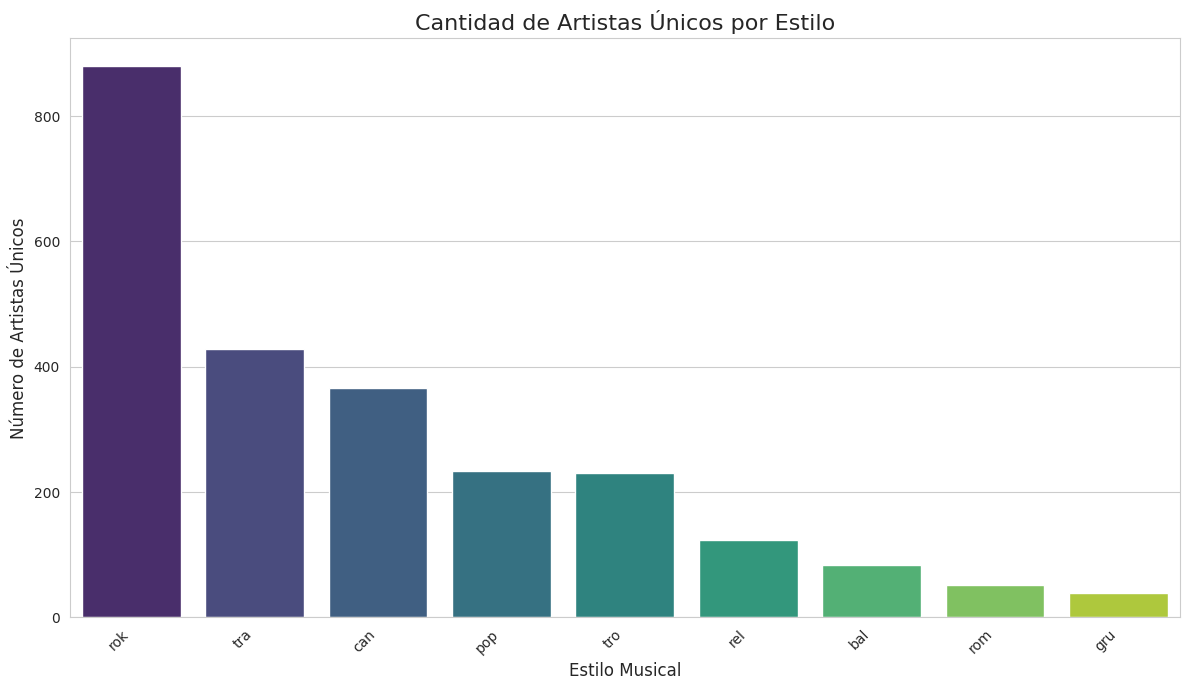

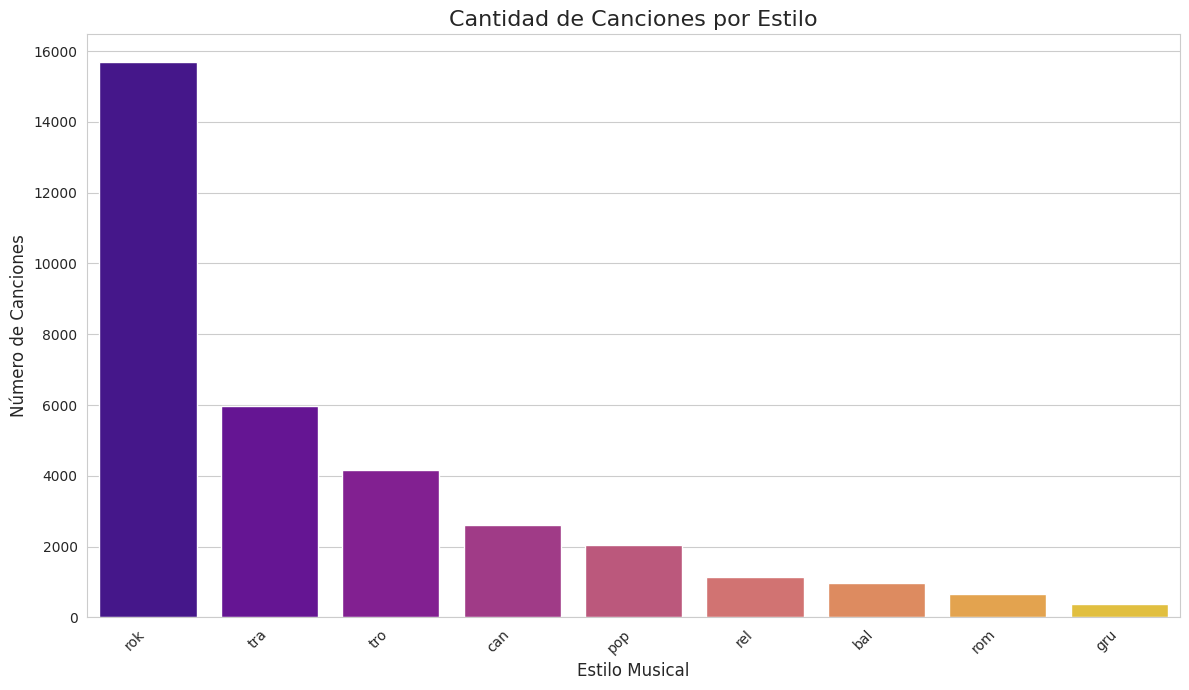

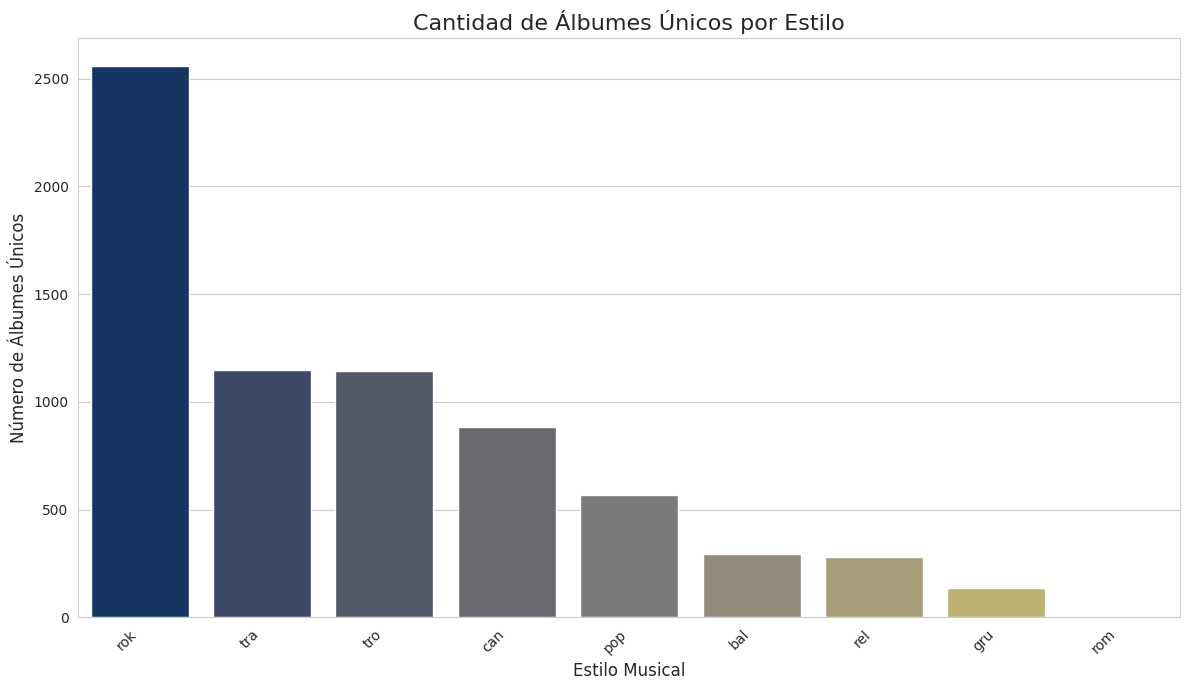

In [14]:
columns_to_exclude = ['song_url', 'lyrics', 'track_name']

df_plot = df_trabajo.drop(columns=columns_to_exclude, errors='ignore')


artist_by_estilo = df_plot.groupby('estilo')['artist_name'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=artist_by_estilo.index, y=artist_by_estilo.values, palette='viridis', hue=artist_by_estilo.index)
plt.title('Cantidad de Artistas Únicos por Estilo', fontsize=16)
plt.xlabel('Estilo Musical', fontsize=12)
plt.ylabel('Número de Artistas Únicos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 2. Cantidad de canciones por estilo ---

song_by_estilo = df_plot['estilo'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=song_by_estilo.index, y=song_by_estilo.values, palette='plasma', hue=song_by_estilo.index)
plt.title('Cantidad de Canciones por Estilo', fontsize=16)
plt.xlabel('Estilo Musical', fontsize=12)
plt.ylabel('Número de Canciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 3. Cantidad de álbumes por estilo ---

album_by_estilo = df_plot.groupby('estilo')['album'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=album_by_estilo.index, y=album_by_estilo.values, palette='cividis', hue=album_by_estilo.index)
plt.title('Cantidad de Álbumes Únicos por Estilo', fontsize=16)
plt.xlabel('Estilo Musical', fontsize=12)
plt.ylabel('Número de Álbumes Únicos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


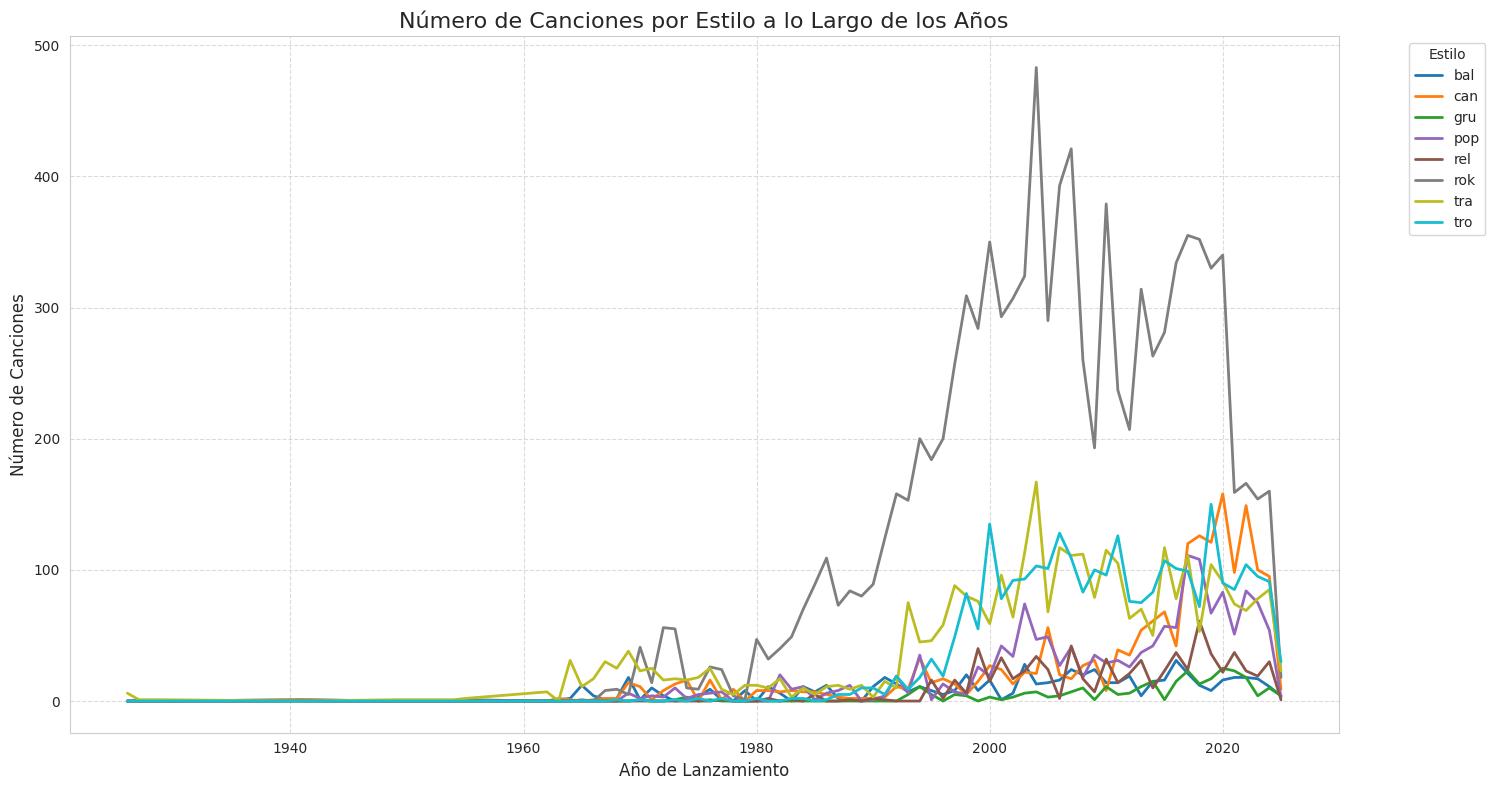

In [15]:
songs_by_year_estilo = df_plot.dropna(subset=['release_year']).groupby(['release_year', 'estilo']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
songs_by_year_estilo.plot(kind='line', ax=plt.gca(), cmap='tab10', linewidth=2)
plt.title('Número de Canciones por Estilo a lo Largo de los Años', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Número de Canciones', fontsize=12)
plt.legend(title='Estilo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


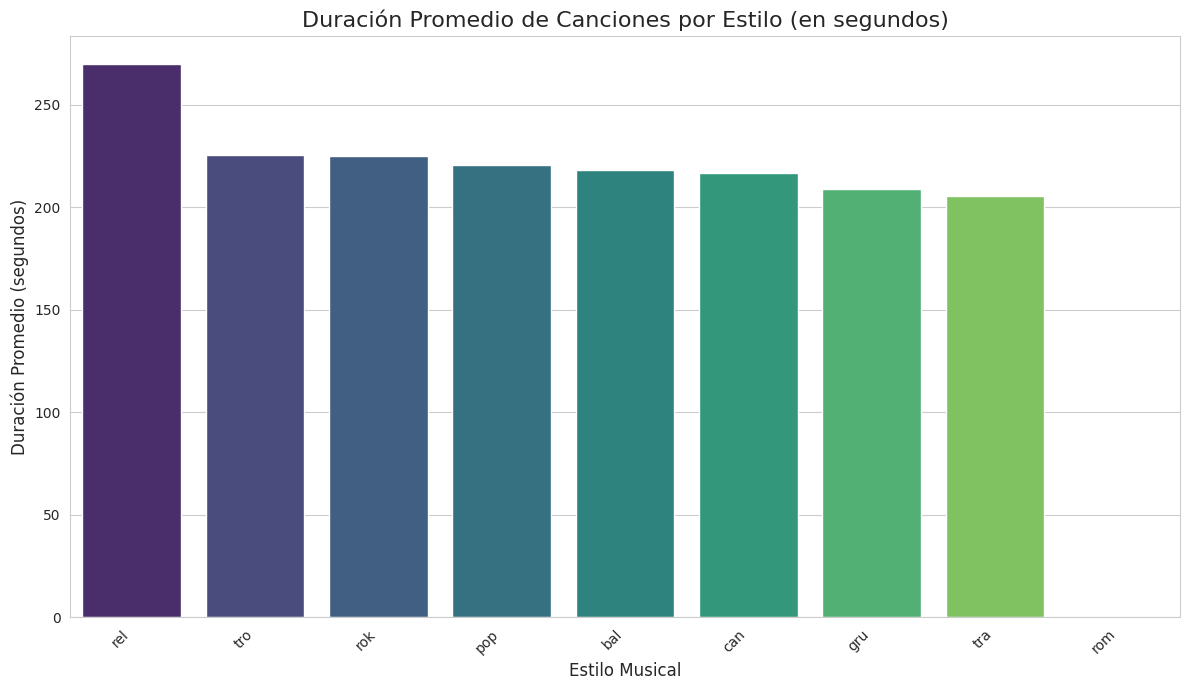

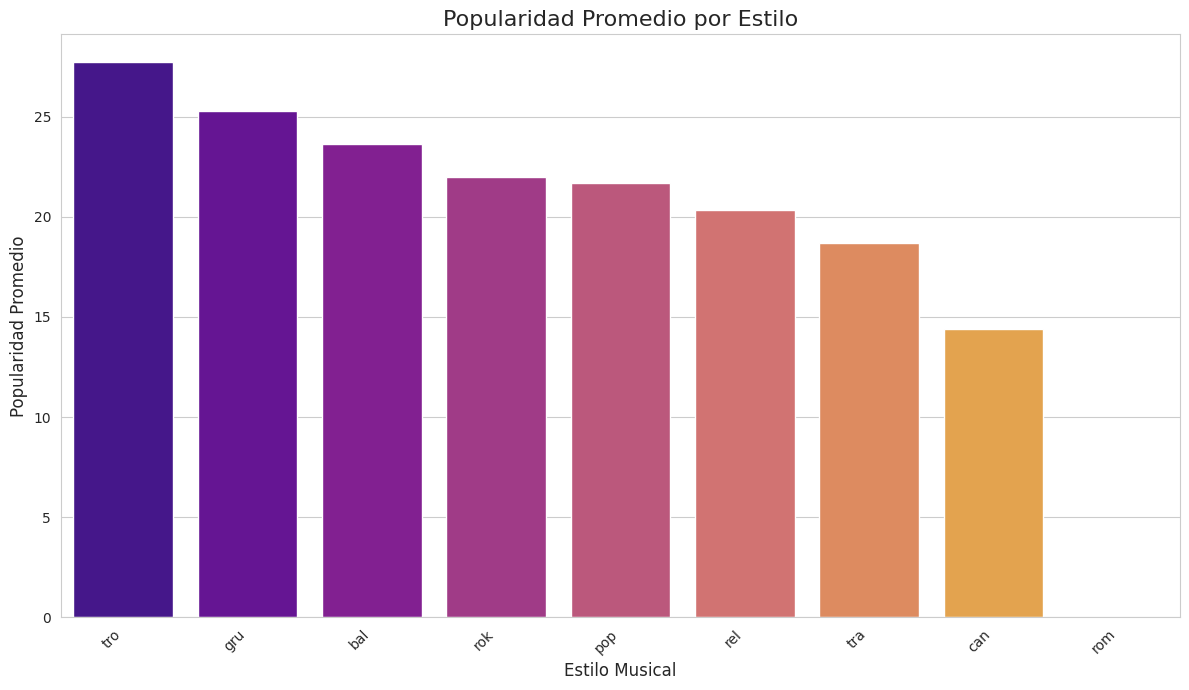

In [16]:
# --- 1. Duración promedio por estilo ---
# Agrupamos por estilo y calculamos la media de 'duration_ms'
# Excluimos NaNs automáticamente por .mean()
avg_duration_by_estilo = df_plot.groupby('estilo')['duration_ms'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_duration_by_estilo.index, y=avg_duration_by_estilo.values / 1000, palette='viridis', hue=avg_duration_by_estilo.index) # Dividir por 1000 para ms a segundos
plt.title('Duración Promedio de Canciones por Estilo (en segundos)', fontsize=16)
plt.xlabel('Estilo Musical', fontsize=12)
plt.ylabel('Duración Promedio (segundos)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 2. Popularidad promedio por estilo ---
# Agrupamos por estilo y calculamos la media de 'popularity'
avg_popularity_by_estilo = df_plot.groupby('estilo')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_popularity_by_estilo.index, y=avg_popularity_by_estilo.values, palette='plasma', hue=avg_popularity_by_estilo.index)
plt.title('Popularidad Promedio por Estilo', fontsize=16)
plt.xlabel('Estilo Musical', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [17]:
df_plot.describe()

,duration_ms,popularity,release_year
count,2.368000e+04,23680.000000,21294.000000
mean,2.223285e+05,21.712711,2006.784869
std,7.568603e+04,16.296299,12.498851
min,1.581300e+04,0.000000,1926.000000
25%,1.810852e+05,8.000000,2000.000000
50%,2.150710e+05,19.000000,2008.000000
75%,2.530428e+05,33.000000,2017.000000
max,2.525935e+06,82.000000,2025.000000


A primera vista diría que los outliers no están tan alejados de los valores más normales. No son absuramente grandes o chicos. Y el mínimo de el año de lanzamiento (1926) que está por debajo de la media - 3*std perfectamente puede ser el año de un tango o canción de folclore.
Por otro lado, la popularidad máxima, de 82 no llega a ser el valor máximo que puede tomar la variable según spotify (va del 0 al 100)
Paraece haber poca información sobre el estilo "rom".


Elegímos el **estilo** como variable objetivo porque, en primera instancia, pensamos que es la que más puede estar relacionada con las letras, tanto en térmios de estructura, palabras más usadas, construcciones metafóricas, etc.
Con lo que, con ciertos datos, sería posible indicar si la canción es de un estilo u otro.
Además, sería interesante ver si los desvíos de esas características se relacionan con otras. Por ejemplo: Si las canciones de rock más largas son de los años sententa, o si las más populares dentro de un género son las que tienen tal o cual característica en las letras.

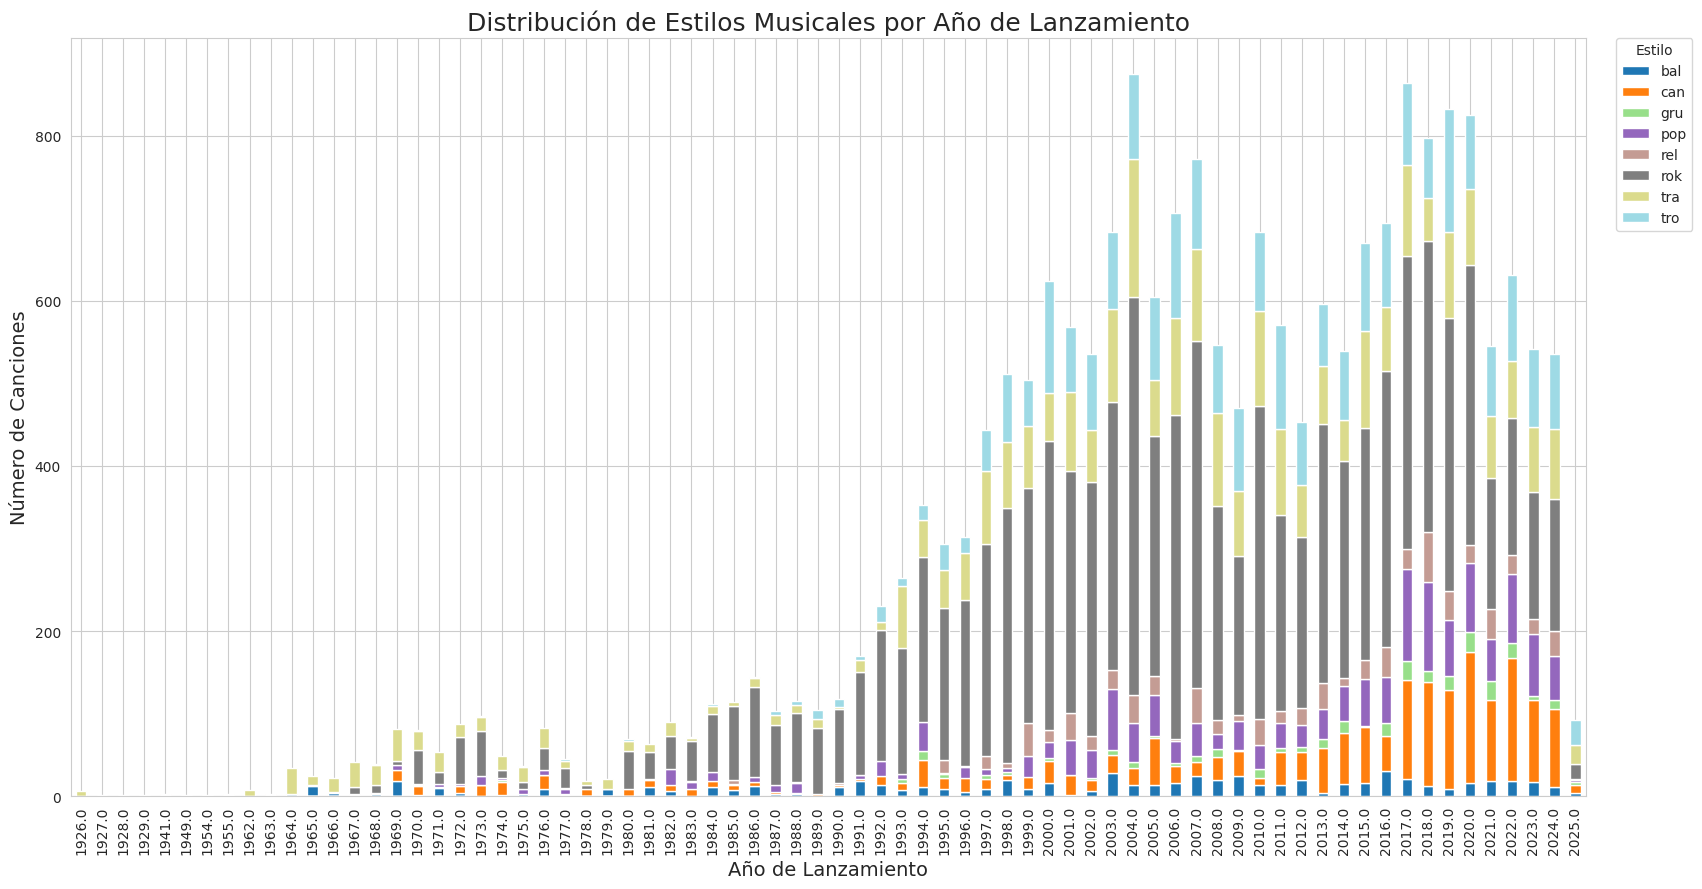

In [18]:
songs_by_year_estilo_stacked = df_plot.dropna(subset=['release_year', 'estilo']).groupby(['release_year', 'estilo']).size().unstack(fill_value=0)
plt.figure(figsize=(18, 9))
songs_by_year_estilo_stacked.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='tab20')

plt.title('Distribución de Estilos Musicales por Año de Lanzamiento', fontsize=18)
plt.xlabel('Año de Lanzamiento', fontsize=14)
plt.ylabel('Número de Canciones', fontsize=14)
plt.xticks(rotation=90, fontsize=10) # Rotar etiquetas para que se lean mejor los años
plt.yticks(fontsize=10)
plt.legend(title='Estilo', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout(rect=[0, 0, 0.95, 1]) # Ajustar layout para que la leyenda no se superponga
plt.show()

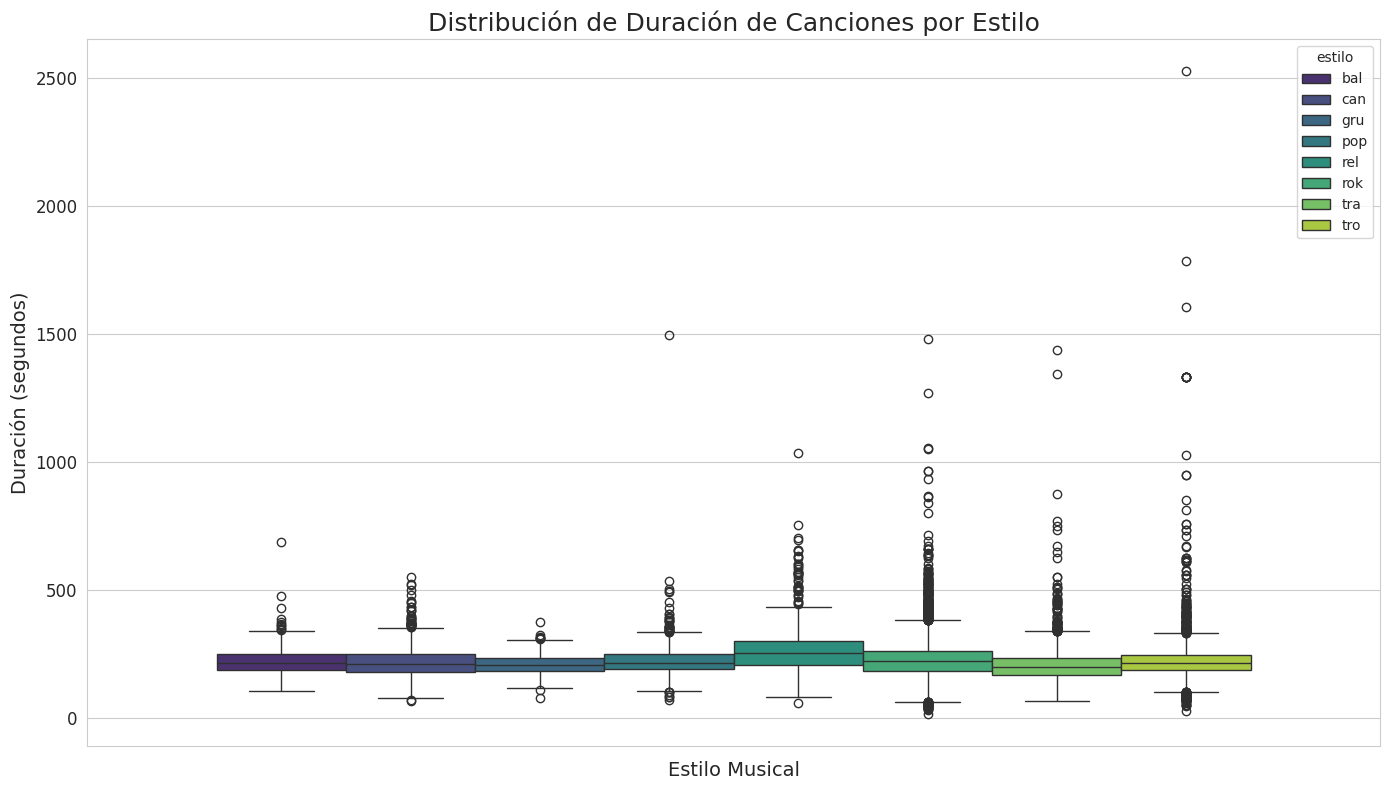

In [19]:
df_plot['duration_seconds'] = df_plot['duration_ms'] / 1000

plt.figure(figsize=(14, 8))
sns.boxplot(hue='estilo', y='duration_seconds', data=df_plot.dropna(subset=['duration_seconds', 'estilo']), palette='viridis')

plt.title('Distribución de Duración de Canciones por Estilo', fontsize=18)
plt.xlabel('Estilo Musical', fontsize=14)
plt.ylabel('Duración (segundos)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

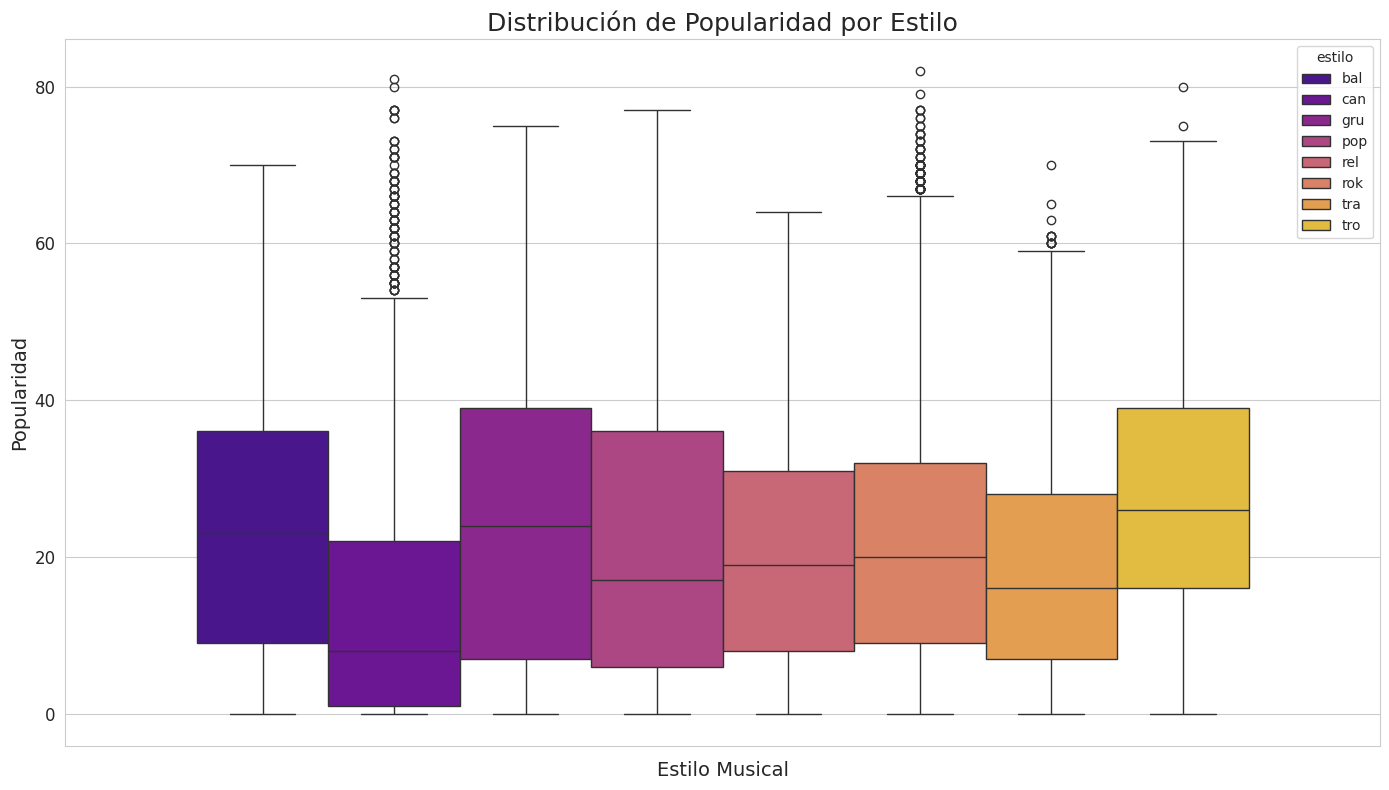

In [20]:
plt.figure(figsize=(14, 8))
sns.boxplot(hue='estilo', y='popularity', data=df_plot.dropna(subset=['popularity', 'estilo']), palette='plasma')

plt.title('Distribución de Popularidad por Estilo', fontsize=18)
plt.xlabel('Estilo Musical', fontsize=14)
plt.ylabel('Popularidad', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [21]:
df_trabajo.loc[:, 'lyrics_processed'] = df_trabajo['lyrics'].fillna('')
df_trabajo.loc[:, 'num_versos'] = df_trabajo['lyrics_processed'].str.count('<br>')
df_trabajo.loc[:, 'len_lyrics'] = df_trabajo['lyrics_processed'].str.len()
umbral_min_versos = 5
umbral_min_len_chars = 100

In [22]:
letras_pequenas = df_trabajo[
    (df_trabajo['num_versos'] < umbral_min_versos) | # Pocos versos
    (df_trabajo['len_lyrics'] < umbral_min_len_chars) | # Poca longitud de caracteres
    (df_trabajo['lyrics'].isna()) # También incluir los que eran NaN originalmente
].copy() # Usar .copy() para evitar SettingWithCopyWarning

print("\n--- Letras Identificadas como Pequeñas o Faltantes para Revisar ---")
# Mostrar las columnas relevantes para la revisión
print(letras_pequenas[['song_name', 'artist_name', 'lyrics', 'num_versos', 'len_lyrics']])
print("-" * 30)



--- Letras Identificadas como Pequeñas o Faltantes para Revisar ---
                              song_name     artist_name  \
222                          Candombito  Kevin Johansen   
236    Everything Is Falling Into Place  Kevin Johansen   
398                             Regresa       Nocturnos   
1836              Y Ahora Mi Cancion Va   Marilina Ross   
2455                Oracion Del Remanso  Nahuel Pennisi   
...                                 ...             ...   
31419                   Te Di Mis Besos  Garras De Amor   
31707                    Que Sera De Ti          Leales   
32241                      La Musiquera        Palmeras   
33384                            Atento          Empuje   
33616                     Viendolo Bien         Chaques   

                                                  lyrics  num_versos  \
222    Los acordes y el bajo siguen en casi toda la c...           1   
236                                             Do (8vo)           0   
398   

In [23]:
letras_pequenas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 222 to 33616
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   song_name               101 non-null    object 
 1   artist_name             101 non-null    object 
 2   lyrics                  101 non-null    object 
 3   estilo                  101 non-null    object 
 4   song_url                101 non-null    object 
 5   album                   69 non-null     object 
 6   release_date            61 non-null     object 
 7   track_name              69 non-null     object 
 8   duration_ms             69 non-null     float64
 9   popularity              69 non-null     float64
 10  normalized_song_name    101 non-null    object 
 11  normalized_artist_name  101 non-null    object 
 12  release_year            61 non-null     float64
 13  lyrics_processed        101 non-null    object 
 14  num_versos              101 non-null    int

In [24]:
letras_pequenas.to_csv("letras_pequenas.csv", index=False)

In [25]:
# Las letras de la cuerda.net son letras de canciones subidas por los usuarios. Por eso, es que hay comentarios, instrucciones, etc de los usuarios 
# junto a las letras de canciones.

# Por ahora, vamos a quitar las canciones que no cumplen con el umbral de versos y caracteres.
mask_not_small = ~((df_trabajo['num_versos'] < umbral_min_versos) |
                   (df_trabajo['len_lyrics'] < umbral_min_len_chars) |
                   (df_trabajo['lyrics'].isna()))

df_trabajo = df_trabajo[mask_not_small].copy()


In [ ]:
import re
import numpy as np

pattern = r'[A-G](?:[#bMmSsUuAaDdIi79136()/+ -]*(?:\s|$))?'

# saco la columna lyrics del daaframe  como un array numpy
lyrics_array = df_trabajo['lyrics_processed'].values.astype(str)

df_trabajo['lyrics_processed'] = np.vectorize(lambda x: re.sub(pattern, '', x))(lyrics_array)

# Eliminar múltiples espacios en blanco
df_trabajo['lyrics_processed'] = df_trabajo['lyrics_processed'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
pattern = r"^\s*[EBGDATe]\s*\|.*$"
lyrics_array = df_trabajo['lyrics_processed'].values.astype(str)

df_trabajo['lyrics_processed'] = np.vectorize(lambda x: re.sub(pattern, '', x))(lyrics_array)

# Eliminar múltiples espacios en blanco
df_trabajo['lyrics_processed'] = df_trabajo['lyrics_processed'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
df_trabajo.to_csv("after_limpieza.csv", index=False)

In [ ]:
pd.set_option('display.max_colwidth', 300)
df_trabajo.sample(20)[[ "lyrics"]]

,lyrics
15980,"Las mujeres se derriten<br>si tenes un escondite.<br>Vámonos a dar un beso<br>tengo un moco de esos.<br>Si me encuentras, en los bares<br>porque no estoy con vos.<br>Si me encuentras, en los bares<br>porque no tengo tu amor.<br>Tres años hace, que no te veo,<br>en los bares me voy a olvidar,<br>..."
28267,"Ódiame por piedad, yo te lo pido, |<br>ódiame sin medida ni clemencia, |<br>odio quiero más que indiferencia, |<br>porque el rencor hiere menos que el olvido. |<br>Si tú me odias quedaré yo convencido<br>que me amaste, mujer, con insistenci..."
13079,"Pasan las horas se pasan los días<br>Las noches, excesos que corren de más<br>De amores ajenos que no ponen freno<br>Historias pasadas que no hay que olvidar<br>Fui tu sereno, tú vago nocturno<br>Tus ojos en fuego se quieren vengar<br>Tus vicios, los míos, tu sexo y mi sexo<br>Hoy mi pasado me v..."
33462,"Te he prometido, que te voy a olvidar..<br>cuánto has querido, yo te supe dar.<br>Sólo y herido, así me dejás..<br>sabiendo que mañana, irás con otro, a ranchár.<br>Llorarás, llorarás, por tus caprichos,<br>si yo sé, que es a mi, a quien quieres.<br>No podrás, ser felíz, con ningún otro,<br>pues..."
28201,Querido amigo la tarde se va acostando en el río<br>y tirado en las arenas te escribo este chamamé<br>y así del norte llevarte hasta el sur de tus desvelos<br>todas las cosas que el viento me trae de Santa Fe.<br>Sabrás que allá en nuestros pagos donde andabas la canoa<br>toda la gente te extrañ...
7565,"Hoy estoy de bajón tengo un blues en el alma<br>algo dentro de mí se rompió y no se arregla con nada<br>Porque estoy de bajón y lo llevó en la espalda<br>dame un beso, un acorde mayor para ver si me calma<br>(Dame un abrazo que cure mi voz dame un silencio que abrigue el dolor<br>dame ..."
29253,De la mano con la trunca<br>Queremos cruzar la puerta<br>Hagan correr los cerrojos<br>Que morimos de impaciencia<br>Quiero vivir en los cielos<br>Que por antuco se azulan<br>Corazón de hermano grande<br>Costado tierno de mi alma<br>Un ramalazo de trigo<br>Se me hace el chala cantando<br>Guitarri...
968,En esta tarde gris<br>de mente vacía<br>se desdibujan en mi<br>tu sombra en la mia.<br>Pinceladas de color<br>otoñales mañanas<br>reinventando nuestra canción<br>al borde de la cama<br>Inútil es perseguir<br>a la razón incendiaria<br>cuando quema el corazón<br>y nos quedamos sin nada.<br>Cuando...
12804,Mira que linda mañana<br>que hoy amaneció<br>el sol dibuja tu cara las sombras se han ido lejos de aquí<br>Abre bien las ventanas<br>por ellas yo voy a entrar<br>abre bien tus ventanas<br>tu casa mi nena voy a visitar<br>buen día nena<br>que bien que estas<br>buen día nena que bien te ves s...
2682,"Ohh-ohh-ohh<br>Yeah<br>Mmm, yo<br>[Pre-Coro]<br>Ey baby no, ohh-ohh-ohh (ohh-ohh-ohh)<br>No ves que me estoy muriendo<br>Porque un ratito me regales tu atención<br>Ohh-ohh-ohh<br>Estoy perdido en ese azul de tus ojos, yeh<br>Ey baby no, no-oh-oh (no-oh-oh)<br>No ves que me estoy muriendo<br>Porq..."


### Fechas importantes
- 30/06: TP 1
- 21/07: TP 2
- 11/08: Video intermedio
- 15/09: TP 3
- 29/09: Video final
- 05/12 y 06/12: Jornada de presentación de videos finales

**Las entregas se realizan vía campus.**

### Papers para chusmear

- ["Rhyme and Style Features for Musical Genre Classification by Song Lyrics" (2008)](https://www.researchgate.net/profile/Rudolf-Mayer/publication/220723682_Rhyme_and_Style_Features_for_Musical_Genre_Classification_by_Song_Lyrics/links/54b7c18d0cf2e68eb2804a33/Rhyme-and-Style-Features-for-Musical-Genre-Classification-by-Song-Lyrics.pdf). Paper que prueba la efectividad de diferentes features (temáticas, estilométricas, sintácticas, rítmicas) para predecir el género de una canción. Entre ellas usan una variante del TTR. De acá se pueden sacar ideas para el TP 2.
- ["The Language of Lyrics: An Analysis of Popular _Billboard_ Songs Across Conditions of Social and Economic Threat" (2009)](https://sci-hub.se/https://journals.sagepub.com/doi/10.1177/0261927x09335259). Paper que analiza las letras de los temas nº1 del ranking de la revista _Billboard_ desde 1955 a 2003. La hipótesis que guía este trabajo es que hay una correlación entre la situación social y las temáticas de las canciones. Ellos detectan, por ejemplo, que un aumento en el índice GHTM (General Hard Times Measure) correlaciona positivamente con la cantidad de pronombres en segunda persona y la longitud del verso.
- _Falso movimiento. El giro cuantitativo en el estudio de la literatura_, de Franco Moretti (2023, EDUNTREF). Una compilación de ensayos de Moretti traducidos al español.